# Machine Learning Engineer Nanodegree
## Capstone Project
## Project 5: Negotiating Buying a Home  

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
%matplotlib inline

try:
    data = pd.read_csv("data.csv")
    data = data.drop(['PID', 'Status', 'Address', 'Subdivision'], axis = 1)
    print "Dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Dataset has 237 samples with 7 features each.


## Data Preprocessing
In this section, we will preprocess the data by cleaning data and and removing outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Data Cleaning

We need to clean the data before we can do any analysis.  The statistics above shows that the minimum value for Fin SF is 0.  This is already a problem since a home cannot have Fin SF of zero for its size.  All the values in each column must be greater than zero.  Therefore, any row that contains values less than 1 will be removed.  Rows with null values will be removed as well.  Finally, we make sure that # Rooms is at least equal to the sum of # of Bedrooms and # Baths.

In [3]:
zero_or_negative = []
for i, r in data.iterrows():
    for c in data.columns:
        if r[c] <= 0:
            zero_or_negative.append(i)  

data = data.dropna().drop(data.index[zero_or_negative].unique())
data = data[data['# Rooms'] - data['# Bedrooms'] - data['# Baths'] >= 0]
data = data.reset_index(drop = True)
display(data.describe())

,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Sales Price,Days On Market
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.376068,2.023932,7.158120,1735.910256,209309.217949,205768.098291,40.213675
std,0.543814,0.351245,1.338036,346.664927,44735.681218,43217.123404,45.927696
min,3.000000,1.000000,5.000000,1016.000000,107900.000000,102000.000000,1.000000
25%,3.000000,2.000000,6.000000,1518.500000,174950.000000,174950.000000,8.250000
50%,3.000000,2.100000,7.000000,1662.000000,209950.000000,205000.000000,23.500000
75%,4.000000,2.100000,8.000000,1899.000000,238587.500000,235000.000000,56.000000
max,5.000000,3.000000,12.000000,3135.000000,375950.000000,355000.000000,384.000000


#### Observations: 

4 bad data points have been removed from the data set, because they were either null, less than 1, or are inconsistent.    

### Implementation: Outlier Removal
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [13]:
# For each feature find the data points with extreme high or low values
index_to_outliers = {}
for feature in data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = data[feature].quantile(0.25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = data[feature].quantile(0.75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers = data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))] 
    display(outliers)
    
    for i in outliers.index.tolist():
        if i in index_to_outliers:
            index_to_outliers[i] += 1
        else:
            index_to_outliers[i] = 1
    
filtered_dict = {k:v for k,v in index_to_outliers.iteritems() if v > 1}
    
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [filtered_dict.keys()]

# Remove the outliers, if any were specified
data = data.drop(data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature '# Bedrooms':


,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Days On Market,Target


Data points considered outliers for the feature '# Baths':


,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Days On Market,Target
2,3,1.1,7,1520,107900,12,-2100
3,3,1.0,5,1188,109270,8,0
4,3,1.1,6,1422,124000,69,22000
5,3,1.1,5,1362,129950,6,-1550
11,3,1.1,6,1362,135000,5,2500
15,3,1.1,6,1416,149900,111,6900
23,3,1.1,6,1520,151950,3,-50
29,3,3.0,7,1600,159950,112,-8050
43,3,1.1,5,1362,167900,101,7400
45,3,1.1,6,1362,169500,37,4500


Data points considered outliers for the feature '# Rooms':


,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Days On Market,Target


Data points considered outliers for the feature 'Fin SF':


,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Days On Market,Target
159,4,2.1,8,2475,229950,36,0
224,5,2.1,10,2500,300000,37,5000
225,4,2.1,9,2500,319000,57,4000
226,4,2.1,8,2649,319900,7,0
227,4,2.1,9,2600,323900,46,13900
228,4,2.1,9,2498,324500,12,24500


Data points considered outliers for the feature 'List Price':


,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Days On Market,Target


Data points considered outliers for the feature 'Days On Market':


,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Days On Market,Target
7,3,2.0,6,1530,134500,132,-20500
41,3,2.0,8,1480,165000,384,17000
72,4,2.0,6,1404,182500,178,8500
110,4,2.1,11,1840,204950,237,24950
123,4,2.1,8,1954,209950,156,0
135,3,2.0,10,1560,217950,136,1950
188,4,2.1,8,2000,247500,129,12500


Data points considered outliers for the feature 'Target':


,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Days On Market,Target
4,3,1.1,6,1422,124000,69,22000
7,3,2.0,6,1530,134500,132,-20500
8,4,2.1,8,1872,134640,22,-10760
35,3,2.1,6,1525,162000,44,41000
41,3,2.0,8,1480,165000,384,17000
44,3,2.1,7,1660,168000,41,18000
110,4,2.1,11,1840,204950,237,24950
115,3,2.1,6,1618,209900,64,19900
128,3,1.1,7,1560,214500,73,-12100
132,3,2.0,7,1728,214950,11,14950


In [14]:
for key, value in filtered_dict.iteritems():
    print "The datapoint {} has outliers for {} features".format(key, value)

The datapoint 128 has outliers for 2 features
The datapoint 4 has outliers for 2 features
The datapoint 7 has outliers for 2 features
The datapoint 41 has outliers for 2 features
The datapoint 110 has outliers for 2 features
The datapoint 228 has outliers for 2 features


#### Observations:

The data points had more than one outlier per feature were removed. Those data points are more likely to be irregularities since there were outliers found in multiple features. They should be removed, because regression models are sensitive to outliers.

### Implementation: Identify feature and target column

The feature columns are the inputs we will use to predict our target column.  A new buyer will have access to every column except for Sales Price when they're purchasing a new home.  They cannot know what the sale prices without thoroughly negotiating with the seller.  However, we trying to predict the difference between the List Price and Sales Price rather than the Sales Price.  Therefore, we need to take the difference between the List and Sale Price to create our target column.

In [6]:
data['Target'] = data['List Price'] - data['Sales Price']
data = data.drop(['Sales Price'], axis=1)
features = data.drop(['Target'], axis=1)
target = data['Target']

## Data Exploration

In this section, we will begin exploring the data through visualizations and code to understand how each feature is related to the others.

In [16]:
# Display a description of the dataset
display(data.describe())

,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Days On Market,Target
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,3.349776,2.021973,7.085202,1712.654709,207746.892377,35.856502,3302.116592
std,0.514289,0.336264,1.261668,308.852587,41705.866541,34.977175,7877.085668
min,3.000000,1.000000,5.000000,1016.000000,107900.000000,1.000000,-10760.000000
25%,3.000000,2.000000,6.000000,1515.000000,174950.000000,8.000000,0.000000
50%,3.000000,2.100000,7.000000,1660.000000,209900.000000,23.000000,1400.000000
75%,4.000000,2.100000,8.000000,1884.000000,235900.000000,52.500000,5425.000000
max,5.000000,3.000000,11.000000,2649.000000,323900.000000,178.000000,83000.000000


### Implementation: Feature Relevance

We need to consider is if any features are actually relevant.  We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [17]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

for c in features.columns:
    new_data = data.drop(c, axis = 1)
    y_all = data[c]
    X_train, X_test, y_train, y_test = train_test_split(new_data, y_all, test_size=0.25, random_state=42)
    score = DecisionTreeRegressor(random_state=0).fit(X_train, y_train).score(X_test, y_test)
    print "The feature {} has a reported prediction score: {}".format(c, score)

The feature # Bedrooms has a reported prediction score: -0.0732807215333
The feature # Baths has a reported prediction score: -0.0178975289683
The feature # Rooms has a reported prediction score: -0.0018943380341
The feature Fin SF has a reported prediction score: 0.245262820137
The feature List Price has a reported prediction score: -0.755191273519
The feature Days On Market has a reported prediction score: -0.91701582358


#### Observations: 

The coefficient of determination r^2 is telling you how much of the information contained in the selected feature is already contained in the remaining features. If the coefficient of determination is 1.0 then all the information contained in this feature is already contained in the renaming features (since we can predict the feature perfectly from the remaining ones). If the coefficient of determination is less than or equal to zero then the remaining features do not already contain the information found in the selected feature (i.e. the select feature is telling something new about the sample).  Almost all the features have a negative r^2 score.  The only feature with a positive r^2 was Fin Sf, but the r^2 was still very low.  It appears every feature is relative.   

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data.

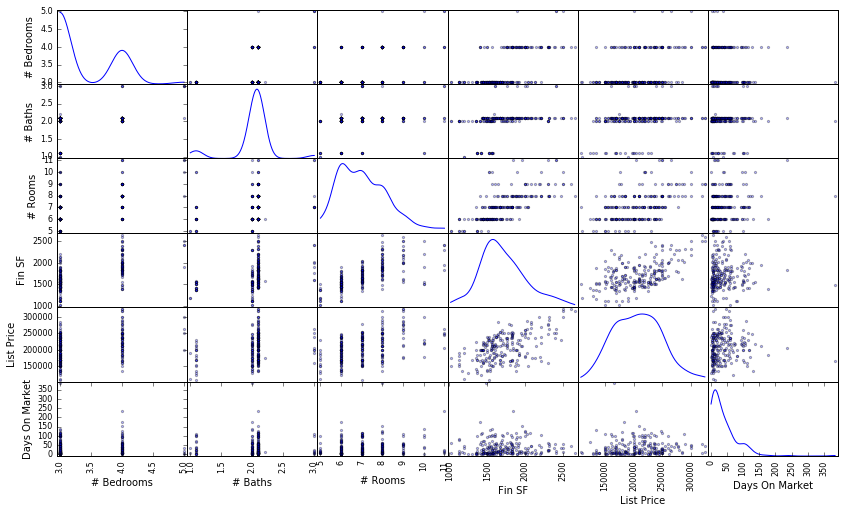

In [9]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(features, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

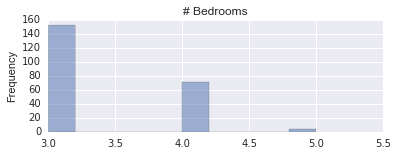

# Bedrooms does not follow a normal distribution


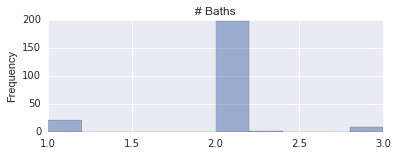

# Baths does not follow a normal distribution


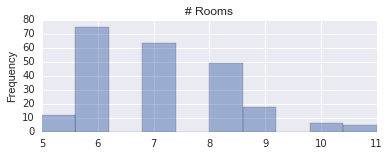

# Rooms does not follow a normal distribution


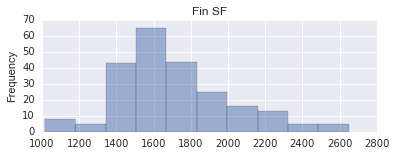

Fin SF does not follow a normal distribution


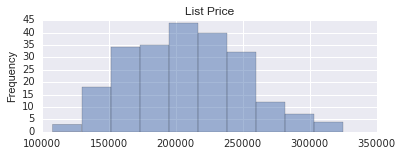

List Price does follow a normal distribution


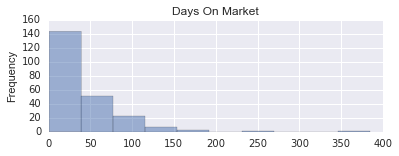

Days On Market does not follow a normal distribution


In [11]:
import scipy.stats as stats

for c in features.columns:
    x = data[c]
    x.plot(kind='hist', alpha=0.5, figsize = (6,2), title=c)
    plt.show()
    z,pvalue = stats.normaltest(x)
    isnormal = 'does' if pvalue > 0.055 else "does not"
    print "{} {} follow a normal distribution".format(c, isnormal)

#### Observations: 

It appears none of the features except for List Price follows a normal distribution.  This means we will need to implement feature scaling.  

C:\Users\jlee\AppData\Local\Continuum\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\jlee\AppData\Local\Continuum\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


                # Bedrooms   # Baths   # Rooms    Fin SF  List Price  \
# Bedrooms        1.000000  0.320225  0.556835  0.639936    0.379777   
# Baths           0.320225  1.000000  0.263700  0.350673    0.253025   
# Rooms           0.556835  0.263700  1.000000  0.708415    0.477294   
Fin SF            0.639936  0.350673  0.708415  1.000000    0.570876   
List Price        0.379777  0.253025  0.477294  0.570876    1.000000   
Days On Market    0.055766 -0.013603  0.175445  0.024580    0.046355   
Target            0.110384  0.032654  0.143204  0.171204    0.249082   

                Days On Market    Target  
# Bedrooms            0.055766  0.110384  
# Baths              -0.013603  0.032654  
# Rooms               0.175445  0.143204  
Fin SF                0.024580  0.171204  
List Price            0.046355  0.249082  
Days On Market        1.000000  0.212107  
Target                0.212107  1.000000  


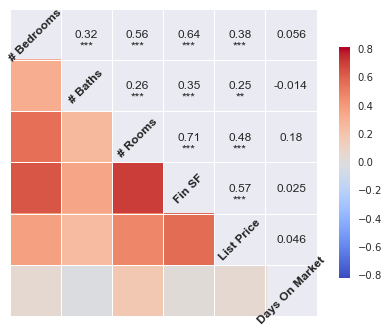

In [10]:
print data.corr(method='pearson')
import seaborn as sns
_ = sns.corrplot(features)

#### Observations: 
    
All the features are positively correlated with one other except for # bathrooms and Days on Markets.  It seems having more bathrooms helper a house seller quicker.  The correlations make sense.  An increase in rooms will increase the size (Fin SF) of the home.  Bigger homes generally take longer to sell.  # Room should be at least # Bedrooms + # Bathrooms.  Therefore positive correlation between #Bedrooms,# Bathrooms, and # Rooms is expected.    

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:

In [18]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)